In [1]:
# This dataset containing information of food restraunts in banglaore who are working with Zomato.
# for each neighborhood there are 6-7 categories of restaurants viz.
# Buffet, Cafes, Delivery, Desserts, Dine-out, Drinks & nightlife, Pubs and bars.
# So, here we are trying to find the best restaurants for customer depends on their need.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
zm=pd.read_csv('E:\project\zomato_EDA\zomato.csv')

In [4]:
zm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
zm.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [6]:
zm.shape

(51717, 17)

In [7]:
### Deleting redundant columns
### Renaming the columns
### Dropping duplicates
### Cleaning the individual columns
### Remove the NaN values from the dataset
### Check for some more transformations

In [8]:
zm.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [9]:
zm.index

RangeIndex(start=0, stop=51717, step=1)

In [10]:
zm.loc[zm.phone=='8088391883']

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)


In [11]:
#Checking the null values by columns:-
#Here we will get to know the count of null value column by column.

In [12]:
zm.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

<AxesSubplot:>

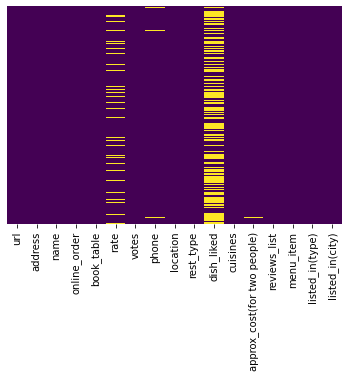

In [13]:
sns.heatmap(zm.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#alternative for checking null values

In [14]:
zm.drop(['url','address','phone','menu_item','dish_liked','reviews_list'],axis=1,inplace=True)
zm.head(3)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari


In [15]:
del zm['listed_in(city)']

In [16]:
zm.isnull().sum()

name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
listed_in(type)                   0
dtype: int64

In [17]:
zm.isnull().sum().sum()

8414

In [18]:
# Renaming columns:-
# Changing the names of columns for better understanding

In [19]:
zm.rename(columns={'name':'restaurants', 'book_table':'booking','listed_in(city)':'city','rate':'rating','approx_cost(for two people)':'cost','listed_in(type)':'types'},inplace=True)
zm.head(10)

,restaurants,online_order,booking,rating,votes,location,rest_type,cuisines,cost,types
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet
5,Timepass Dinner,Yes,No,3.8/5,286,Basavanagudi,Casual Dining,North Indian,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,Mysore Road,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800,Buffet
7,Onesta,Yes,Yes,4.6/5,2556,Banashankari,"Casual Dining, Cafe","Pizza, Cafe, Italian",600,Cafes
8,Penthouse Cafe,Yes,No,4.0/5,324,Banashankari,Cafe,"Cafe, Italian, Continental",700,Cafes
9,Smacznego,Yes,No,4.2/5,504,Banashankari,Cafe,"Cafe, Mexican, Italian, Momos, Beverages",550,Cafes


In [20]:
#Droping NaN values:-
#Droping out NaN values helps for getting better result and understanding.

In [21]:
len(zm)   #51717

51717

In [22]:

zm.dropna(inplace=True)


In [23]:
zm.isnull().values.any()

False

In [24]:
zm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43533 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   restaurants   43533 non-null  object
 1   online_order  43533 non-null  object
 2   booking       43533 non-null  object
 3   rating        43533 non-null  object
 4   votes         43533 non-null  int64 
 5   location      43533 non-null  object
 6   rest_type     43533 non-null  object
 7   cuisines      43533 non-null  object
 8   cost          43533 non-null  object
 9   types         43533 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.7+ MB


In [25]:
#Finding out the duplicate rows:-
#Helps to find the same repeated rows.
#Then removing the duplicate rows for understanding the data.

In [26]:
zm[zm.duplicated()].count().sum()

125750

In [27]:
zm.drop_duplicates(inplace=True)

In [28]:
zm.shape

(30958, 10)

In [29]:
zm

,restaurants,online_order,booking,rating,votes,location,rest_type,cuisines,cost,types
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet
...,...,...,...,...,...,...,...,...,...,...
51709,The Farm House Bar n Grill,No,No,3.7 /5,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800,Pubs and bars
51711,Bhagini,No,No,2.5 /5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800,Pubs and bars
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,Continental,"1,500",Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars


#### Cleaning individual columns:-

#### (1) column:- ratings

In [30]:
zm['rateNEW']=zm['rating'].str.split('/', expand=True)[0]
zm['rateNEW'] = zm['rateNEW'].replace(np.nan, 0)


In [31]:
zm['rateNEW'] = zm['rateNEW'].replace(['NEW','-']).astype(float, errors = 'raise')

In [32]:
zm.rateNEW.unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [33]:
zm.rateNEW.head(10)

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
5    3.8
6    3.6
7    4.6
8    4.0
9    4.2
Name: rateNEW, dtype: float64

In [34]:
def rate(value):
    if value=='NEW' or value=='-':
        return int(0)
    else:
        value=value.split('/')
        value=value[0]
        return float(value)
    
zm['rating']=zm['rating'].apply(rate)
zm['rating'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rating, dtype: float64

In [35]:
#Counting the NaN valuesn in rating column

zm['rating'].isnull().sum()

0

In [36]:
zm.rating.dropna(inplace=True)

In [37]:
zm.rating.isnull().sum()

0

In [38]:
zm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30958 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   restaurants   30958 non-null  object 
 1   online_order  30958 non-null  object 
 2   booking       30958 non-null  object 
 3   rating        30958 non-null  float64
 4   votes         30958 non-null  int64  
 5   location      30958 non-null  object 
 6   rest_type     30958 non-null  object 
 7   cuisines      30958 non-null  object 
 8   cost          30958 non-null  object 
 9   types         30958 non-null  object 
 10  rateNEW       30958 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 2.8+ MB


#### (2) column : location

In [39]:
zm.isnull().sum()

restaurants     0
online_order    0
booking         0
rating          0
votes           0
location        0
rest_type       0
cuisines        0
cost            0
types           0
rateNEW         0
dtype: int64

In [40]:
zm['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'CV Raman Nagar', 'Electronic City', 'Wilson Garden',
       'Shanti Nagar', 'Koramangala 5th Block', 'Richmond Road', 'HSR',
       'Marathahalli', 'Koramangala 7th Block', 'Bellandur',
       'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'MG Road', 'Brigade Road', 'Lavelle Road',
       'Church Street', 'Ulsoor', 'Residency Road', 'Shivajinagar',
       'Infantry Road', 'St. Marks Road', 'Cunningham Road',
       'Race Course Road', 'Commercial Street', 'Vasanth Nagar', 'Domlur',
       'Koramangala 8th Block', 'Ejipura', 'Jeevan Bhima Nagar',
       'Old Madras Road', 'Seshadripuram', 'Kammanahalli',
       'Koramanga

In [41]:
a_loc = zm['location'].value_counts(ascending=False)
a_loc

BTM                      2228
Indiranagar              1653
Whitefield               1630
Koramangala 5th Block    1577
HSR                      1558
                         ... 
Central Bangalore           5
Yelahanka                   4
Rajarajeshwari Nagar        2
Nagarbhavi                  1
Peenya                      1
Name: location, Length: 92, dtype: int64

#### (3) column : rest_type

In [42]:
b_rest_type = zm['rest_type'].value_counts()
b_rest_type

Quick Bites                   10143
Casual Dining                  7311
Cafe                           2495
Dessert Parlor                 1357
Delivery                       1117
                              ...  
Dessert Parlor, Kiosk             2
Bakery, Food Court                2
Food Court, Beverage Shop         2
Quick Bites, Kiosk                1
Dessert Parlor, Food Court        1
Name: rest_type, Length: 87, dtype: int64

#### (4) column: types

In [43]:
c_types = zm['types'].value_counts()
c_types

Delivery              14159
Dine-out              11354
Desserts               2117
Cafes                  1184
Drinks & nightlife      894
Buffet                  665
Pubs and bars           585
Name: types, dtype: int64

#### (5) column: cost

In [44]:
zm.cost.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [45]:
def money(value):                     # def a function then apply it in cost column  
    value=str(value)
    if ',' in value:                   # we need to remove "," and if "," is not there return the same value in int format
        value=value.replace(',','')
        return int(value)
    else:
        return int(value)

zm['cost']=zm['cost'].apply(money) 

In [46]:
zm.cost.unique()

array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
        750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
        199,   80, 1100,  160, 1600,  230,  130, 1700, 1400, 1350, 2200,
       2000, 1800, 1900,  180,  330, 2500, 2100, 3000, 2800, 3400,   50,
         40, 1250, 3500, 4000, 2400, 2600, 1450,   70, 3200,  560,  240,
        360, 6000, 1050, 2300, 4100,  120, 5000, 3700, 1650, 2700, 4500],
      dtype=int64)

In [47]:
zm.cost.info()

<class 'pandas.core.series.Series'>
Int64Index: 30958 entries, 0 to 51716
Series name: cost
Non-Null Count  Dtype
--------------  -----
30958 non-null  int64
dtypes: int64(1)
memory usage: 483.7 KB


#### (6) column:-booking

In [48]:
zm.booking.unique()

array(['Yes', 'No'], dtype=object)

#### (7) column:-online order

In [49]:
zm.online_order.unique()

array(['Yes', 'No'], dtype=object)

#### (8) column:-cuisines

In [50]:
d_cuisines=zm['cuisines'].value_counts()
d_cuisines

North Indian                                                  1602
North Indian, Chinese                                         1401
South Indian                                                   902
Bakery, Desserts                                               471
Biryani                                                        429
                                                              ... 
Bakery, Fast Food, Burger, Rolls, Beverages                      1
Fast Food, Kerala, Mangalorean, Seafood, South Indian            1
Pizza, American                                                  1
North Indian, South Indian, Chinese, Desserts, Street Food       1
North Indian, Chinese, Arabian, Momos                            1
Name: cuisines, Length: 2487, dtype: int64

#### (9) column:-restaurants

In [51]:
zm.groupby('restaurants').count().head(50)


,online_order,booking,rating,votes,location,rest_type,cuisines,cost,types,rateNEW
restaurants,,,,,,,,,,
#FeelTheROLL,2,2,2,2,2,2,2,2,2,2
#L-81 Cafe,4,4,4,4,4,4,4,4,4,4
#refuel,3,3,3,3,3,3,3,3,3,3
1000 B.C,2,2,2,2,2,2,2,2,2,2
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,2,2,2,2,2,2,2,2,2,2
11 to 11 Express Biriyanis,2,2,2,2,2,2,2,2,2,2
1131 Bar + Kitchen,6,6,6,6,6,6,6,6,6,6
12th Main - Grand Mercure,6,6,6,6,6,6,6,6,6,6
1441 Pizzeria,5,5,5,5,5,5,5,5,5,5


In [52]:
zm['restaurants']=zm['restaurants'].str.replace('[Ãx][^A-Za-z]+','',regex=True) 
#Regular Expression, is a sequence of characters that forms a search pattern.
# [^A-Za-z] 	  Returns a match for any character EXCEPT A-Z and a-z
# This matches a single non-letter. So each single non-letter is replaced by a +. You need to say "one or more"

In [53]:
zm.groupby('restaurants').count().head(10)

,online_order,booking,rating,votes,location,rest_type,cuisines,cost,types,rateNEW
restaurants,,,,,,,,,,
#FeelTheROLL,2,2,2,2,2,2,2,2,2,2
#L-81 Cafe,4,4,4,4,4,4,4,4,4,4
#refuel,3,3,3,3,3,3,3,3,3,3
1000 B.C,2,2,2,2,2,2,2,2,2,2
100C,2,2,2,2,2,2,2,2,2,2
11 to 11 Express Biriyanis,2,2,2,2,2,2,2,2,2,2
1131 Bar + Kitchen,6,6,6,6,6,6,6,6,6,6
12th Main - Grand Mercure,6,6,6,6,6,6,6,6,6,6
1441 Pizzeria,5,5,5,5,5,5,5,5,5,5


#### (10) column : votes

In [54]:
zm.votes.isnull().sum()

0

In [55]:
zm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30958 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   restaurants   30958 non-null  object 
 1   online_order  30958 non-null  object 
 2   booking       30958 non-null  object 
 3   rating        30958 non-null  float64
 4   votes         30958 non-null  int64  
 5   location      30958 non-null  object 
 6   rest_type     30958 non-null  object 
 7   cuisines      30958 non-null  object 
 8   cost          30958 non-null  int64  
 9   types         30958 non-null  object 
 10  rateNEW       30958 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 2.8+ MB


In [56]:
zm.isnull().sum()

restaurants     0
online_order    0
booking         0
rating          0
votes           0
location        0
rest_type       0
cuisines        0
cost            0
types           0
rateNEW         0
dtype: int64

In [57]:
zm.shape

(30958, 11)

In [58]:
#del zm['rateNEW']

In [59]:
zm.to_csv('E:/project/zomato_EDA/clean_zomato.csv')


###### EDA done and dusted  :-D

# Data visualization:


In [60]:
#Restaurants delivering Online or not
#Table booking Rate vs Rate
#Best Location
#Relation between Location and Rating
#Cost of Restaurant
#No. of restaurants in a Location
#Restaurant type
#Most famous restaurant chains in Bengaluru

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


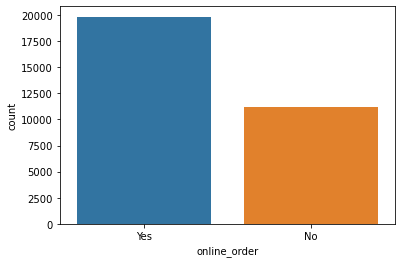

In [61]:
sns.countplot(zm.online_order)
plt.show()

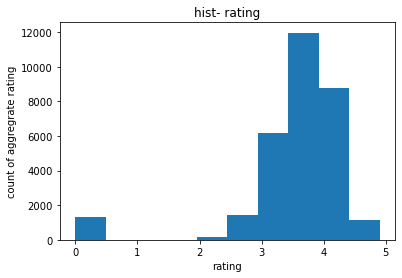

In [62]:
plt.hist(zm.rating)
plt.xlabel('rating')
plt.ylabel('count of aggregrate rating')
plt.title('hist- rating')
plt.show()

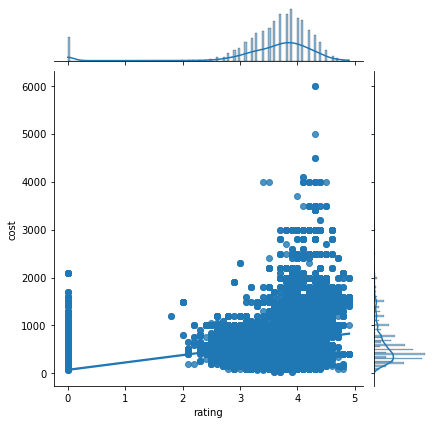

In [63]:
sns.jointplot(x = "rating", y ="cost", kind = "reg", data = zm)

<AxesSubplot:>

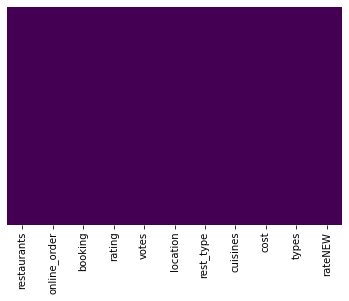

In [64]:
sns.heatmap(zm.isna(),yticklabels=False,cbar=False,cmap='viridis')


In [65]:
zm

,restaurants,online_order,booking,rating,votes,location,rest_type,cuisines,cost,types,rateNEW
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,4.1
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,4.1
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,3.8
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,3.7
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,3.8
...,...,...,...,...,...,...,...,...,...,...,...
51709,The Farm House Bar n Grill,No,No,3.7,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800,Pubs and bars,3.7
51711,Bhagini,No,No,2.5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800,Pubs and bars,2.5
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,Continental,1500,Pubs and bars,3.6
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2500,Pubs and bars,4.3
